In [22]:
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys
%matplotlib inline
fig_dir = "/Users/crankshaw/model-serving/clipper_paper/ModelServingPaper/nsdi_2017/fake-figs"


In [3]:
results_files = []
for name in os.listdir("."):
    if "results" in name:
        results_files.append(name)


In [4]:
print results_files

['cache_hit_rate_0_hitrate_160905-193132_results.json', 'cache_hit_rate_100_hitrate_160905-212421_results.json', 'cache_hit_rate_10_hitrate_160905-194229_results.json', 'cache_hit_rate_20_hitrate_160905-195510_results.json', 'cache_hit_rate_30_hitrate_160905-200237_results.json', 'cache_hit_rate_40_hitrate_160905-201812_results.json', 'cache_hit_rate_50_hitrate_160905-202833_results.json', 'cache_hit_rate_60_hitrate_160905-203537_results.json', 'cache_hit_rate_70_hitrate_160905-210900_results.json', 'cache_hit_rate_80_hitrate_160905-210158_results.json', 'cache_hit_rate_90_hitrate_160905-211624_results.json']


In [15]:
def get_results(fname):
    with open(fname, "r") as f:
        results = json.load(f)
        hit_rate = [h["ratio"] for h in results["ratio_counters"] if h["name"] == "cache_hits"][0]
#         print results["meters"]
        thruput = [h["rate"] for h in results["meters"] if h["name"] == "spark_svm:cache_included_thruput"][0]
    return (hit_rate, thruput)




(0.0, 0.9999168, 0.098076, 0.198766, 0.2982, 0.397036, 0.497983, 0.598553, 0.697965, 0.797838, 0.89862575)
(6759.517598147793, 105974.09346713693, 7607.691689737199, 8685.700313600602, 9988.75351831372, 12103.26505300138, 14572.07173623121, 18623.674862446933, 24150.837193878953, 37761.96604787021, 79473.38178766223)


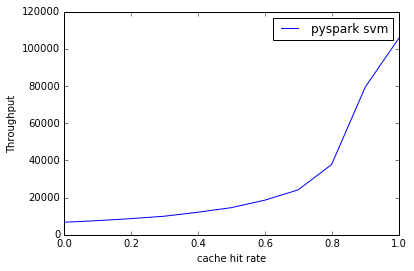

In [23]:
extracted_results = [get_results(cur_file) for cur_file in results_files]
extracted_results.sort()



hit_rates, thruputs = zip(*extracted_results)
fig, ax = plt.subplots()
ax.plot(hit_rates, thruputs, label="pyspark svm")
# xs = np.arange(0, 1.1, 0.1)
# ys = 7500 + 106000*xs
# ax.plot(xs, ys, label="upper bound")
ax.set_xlabel("cache hit rate")
ax.set_ylabel("Throughput")
ax.legend(loc=0)
ax.set_xlim(0.0, 1.0)
plt.savefig("%s/pred_thru_vs_cache_hit_rate.pdf" % (fig_dir), bbox_inches='tight')
plt.show()